# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula:** Javier Alejandro Pérez Garza A01284386

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [131]:
# Incluye aquí todas las librerías que consideres necesarias:

from google.colab import drive
drive.mount('/content/drive')
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


La rotación de personal, conocida como employee attrition en inglés, es un fenómeno que enfrentan constantemente tanto empresas pequeñas como grandes organizaciones. Este término hace referencia al proceso en el cual los empleados dejan una empresa, ya sea de manera voluntaria o involuntaria. Aunque ciertas tasas de rotación son normales y esperadas, aumentar la frecuencia de este fenómeno puede generar múltiples desafíos dentro de la empresa, como el incremento de costos asociados al reclutamiento de nuevos empleados, la pérdida de talento clave y una disminución en la productividad de las tareas. De este modo, el problema de rotación de personal se entiende por buscar predecir qué empleados tienen mayor probabilidad de abandonar la organización para así poder evaluar la situación y tomar medidas tempranas que beneficien a todas las partes involucradas.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [132]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4030 - Inteligencia Artificial y Aprendizaje Automatico/Semana 3/"
os.chdir(DIR)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++



Sin include="all", describe() analiza solo columnas numéricas, mientras que con include="all" también incluye estadísticas de columnas con otro tipo de variable incluidas en nuestro DataFrame.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Todos los datos son iguales. Solo tiene la variable 'Y'.

**b)	EmployeeCount**: De igual manera, todos los datos tienen valor de '1.0'.

**c)	StandardHours**: Igual que las dos variables anteriores, todos los registros tienen el mismo valor de '80.0'.

Al no presentar variabilidad, estas variables no contribuyen a identificar diferencias o patrones, y no se puede sacar información adicional al hacer un análisis a partir de estas.

**d)	EmployeeNumber**: Solo es un identificador de empleado que no tiene valor para análisis.

++++++++ Termina la sección de agregar texto. +++++++++++




In [133]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor manera.**

In [134]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++


X = df.drop('Attrition', axis=1)
y = df['Attrition']

Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, stratify=ytemp, random_state=42)

print(f"Conjunto de Entrenamiento: {Xtrain.shape}")
print(f"Conjunto de Validación: {Xval.shape}")
print(f"Conjunto de Prueba: {Xtest.shape}")

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Conjunto de Entrenamiento: (1029, 30)
Conjunto de Validación: (220, 30)
Conjunto de Prueba: (221, 30)


# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [135]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


encoder = LabelEncoder()
ytrainT = encoder.fit_transform(ytrain)   # Conjunto de entrenamiento
yvalT = encoder.transform(yval)           # Conjunto de validación
ytestT = encoder.transform(ytest)         # Conjunto de prueba

#El uso de.fit_transform() y transform() evitan filtrado

display(pd.Series(ytrainT).value_counts(normalize=True))
print("""Si se tiene un problema de datos desbalanceados.""")
# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++
print('Porcentaje de datos en cada clase de entrenamiento - Attrition:', pd.Series(ytrainT).value_counts() / ytrainT.shape[0])

,proportion
0,0.838678
1,0.161322


Si se tiene un problema de datos desbalanceados.
Porcentaje de datos en cada clase de entrenamiento - Attrition: 0    0.838678
1    0.161322
Name: count, dtype: float64


# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

In [136]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.

#Revisión de valores faltantes
df.isna().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [137]:
Xtrain.isna().sum()

,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0
HourlyRate,0


In [138]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 853 to 1292
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1029 non-null   int64 
 1   BusinessTravel            1029 non-null   object
 2   DailyRate                 1029 non-null   int64 
 3   Department                1029 non-null   object
 4   DistanceFromHome          1029 non-null   int64 
 5   Education                 1029 non-null   int64 
 6   EducationField            1029 non-null   object
 7   EnvironmentSatisfaction   1029 non-null   int64 
 8   Gender                    1029 non-null   object
 9   HourlyRate                1029 non-null   int64 
 10  JobInvolvement            1029 non-null   int64 
 11  JobLevel                  1029 non-null   int64 
 12  JobRole                   1029 non-null   object
 13  JobSatisfaction           1029 non-null   int64 
 14  MaritalStatus             1

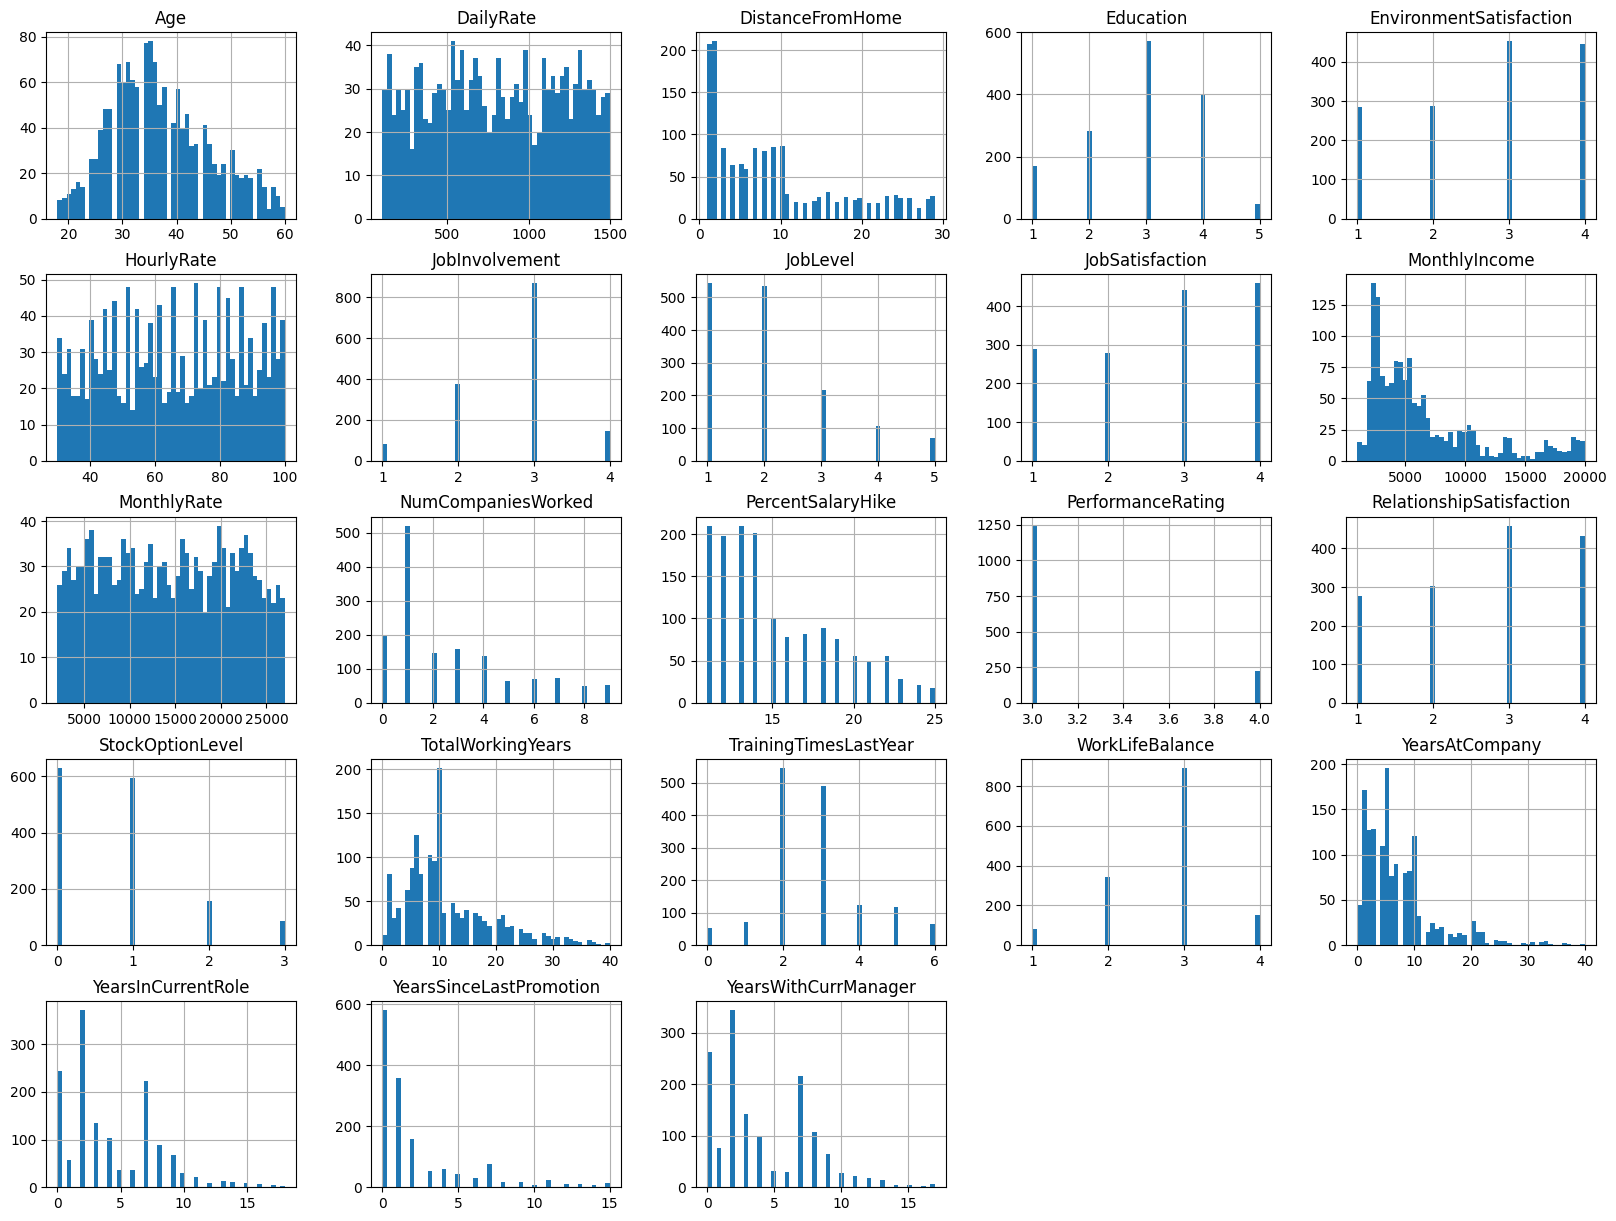

In [139]:
#Histogramas de Variables Numericas df
df.hist(bins=50,figsize=(20,15))
plt.show()

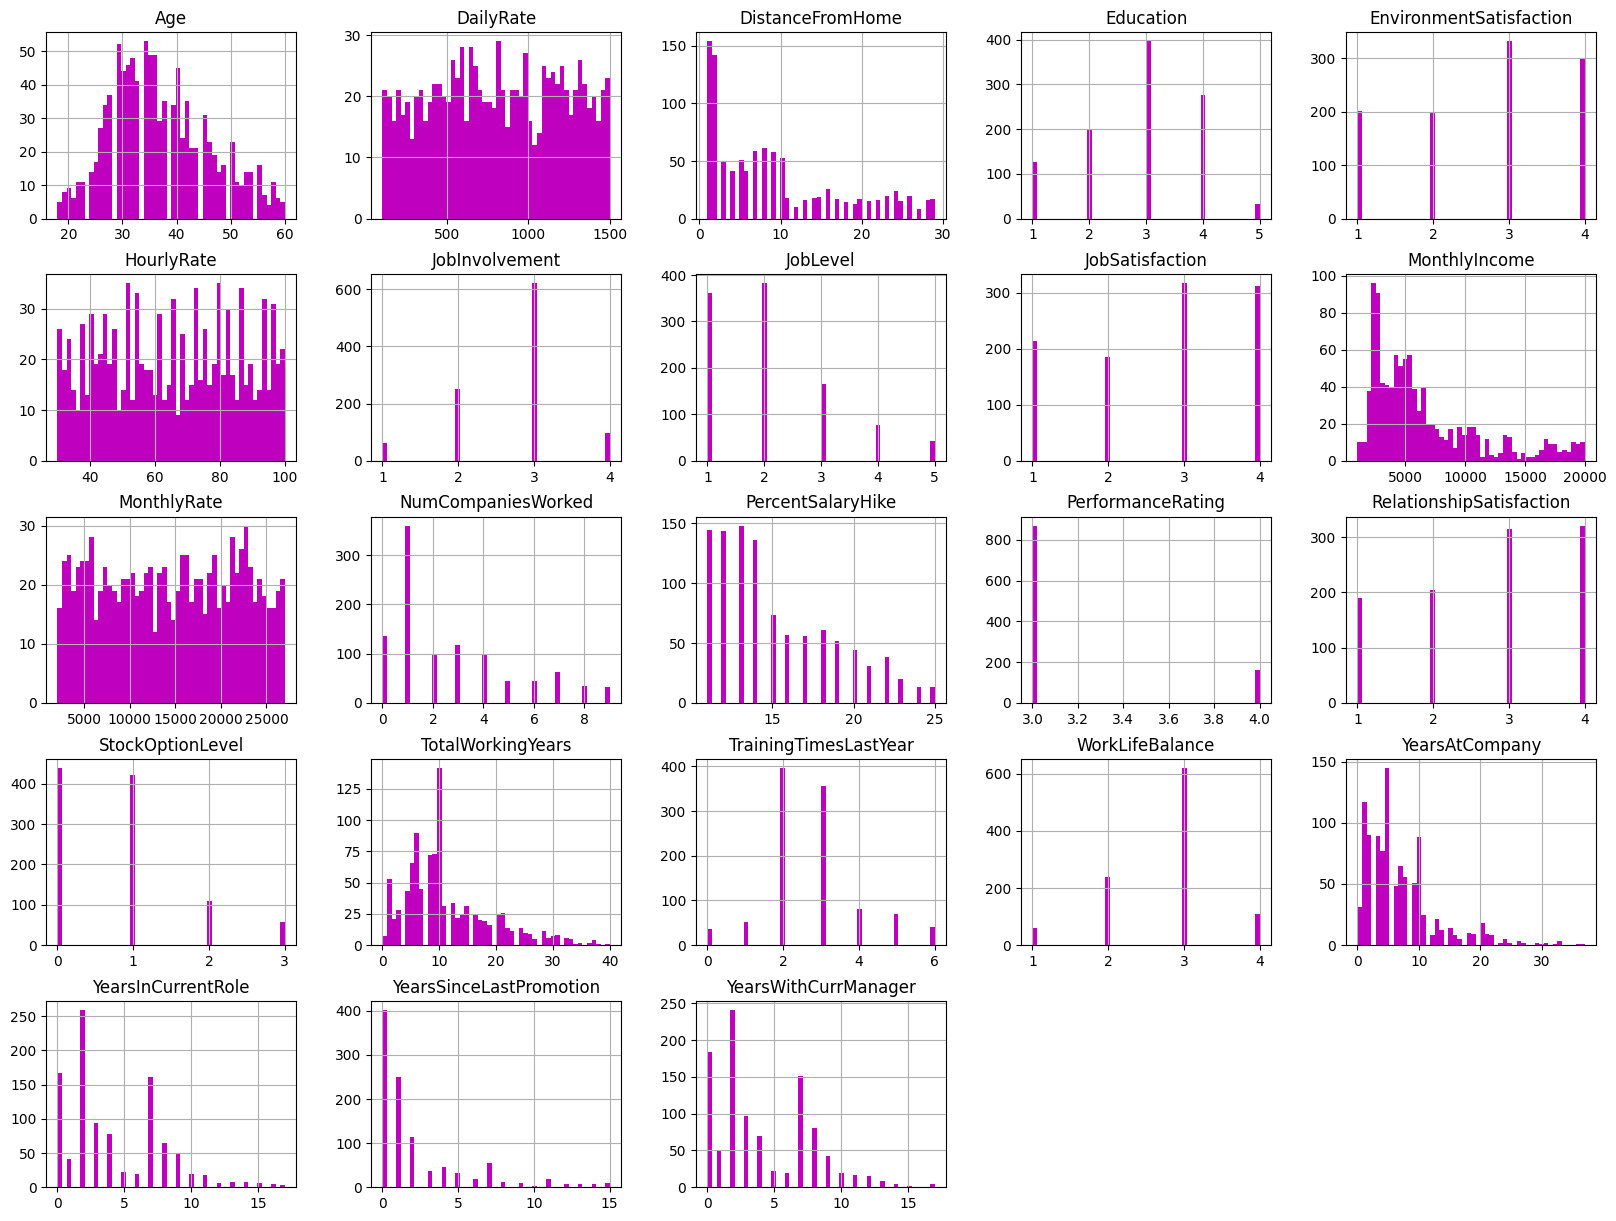

In [140]:
#Histogramas de Variables Numericas Xtrain
Xtrain.hist(bins=50,figsize=(20,15), color='#BF00BF')
plt.show()

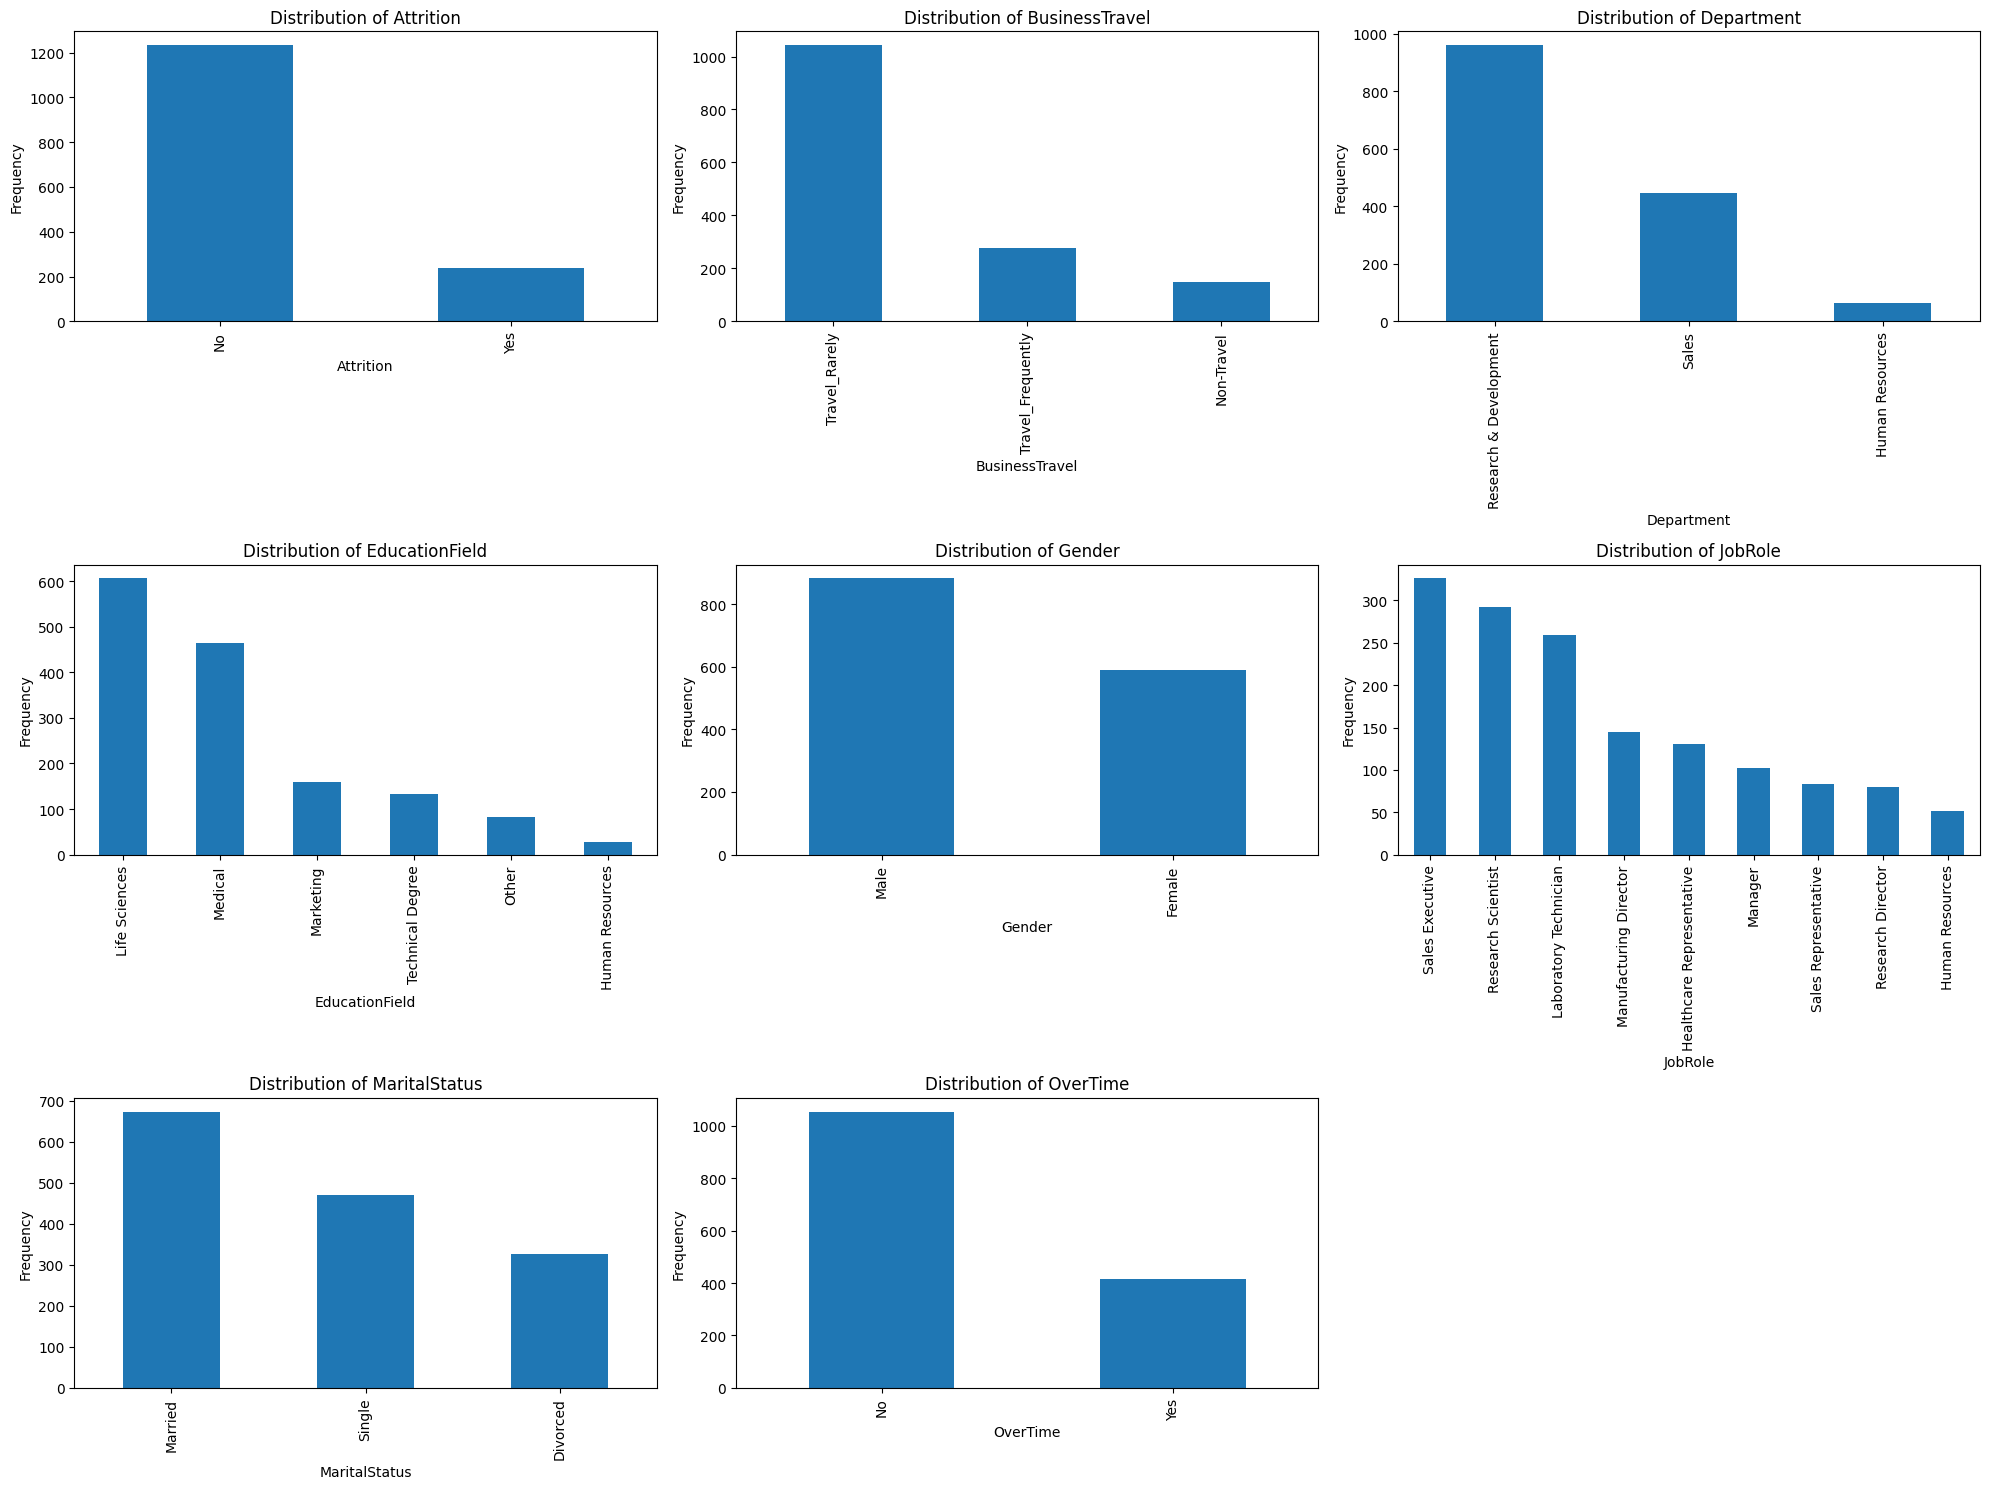

In [141]:
#Gráfico de Barras para variables categoricas df
categorical_columns = df.select_dtypes(exclude=['number']).columns

fig, axes = plt.subplots(math.ceil(len(categorical_columns) / 3), 3, figsize=(20, 5 * math.ceil(len(categorical_columns) / 3)))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

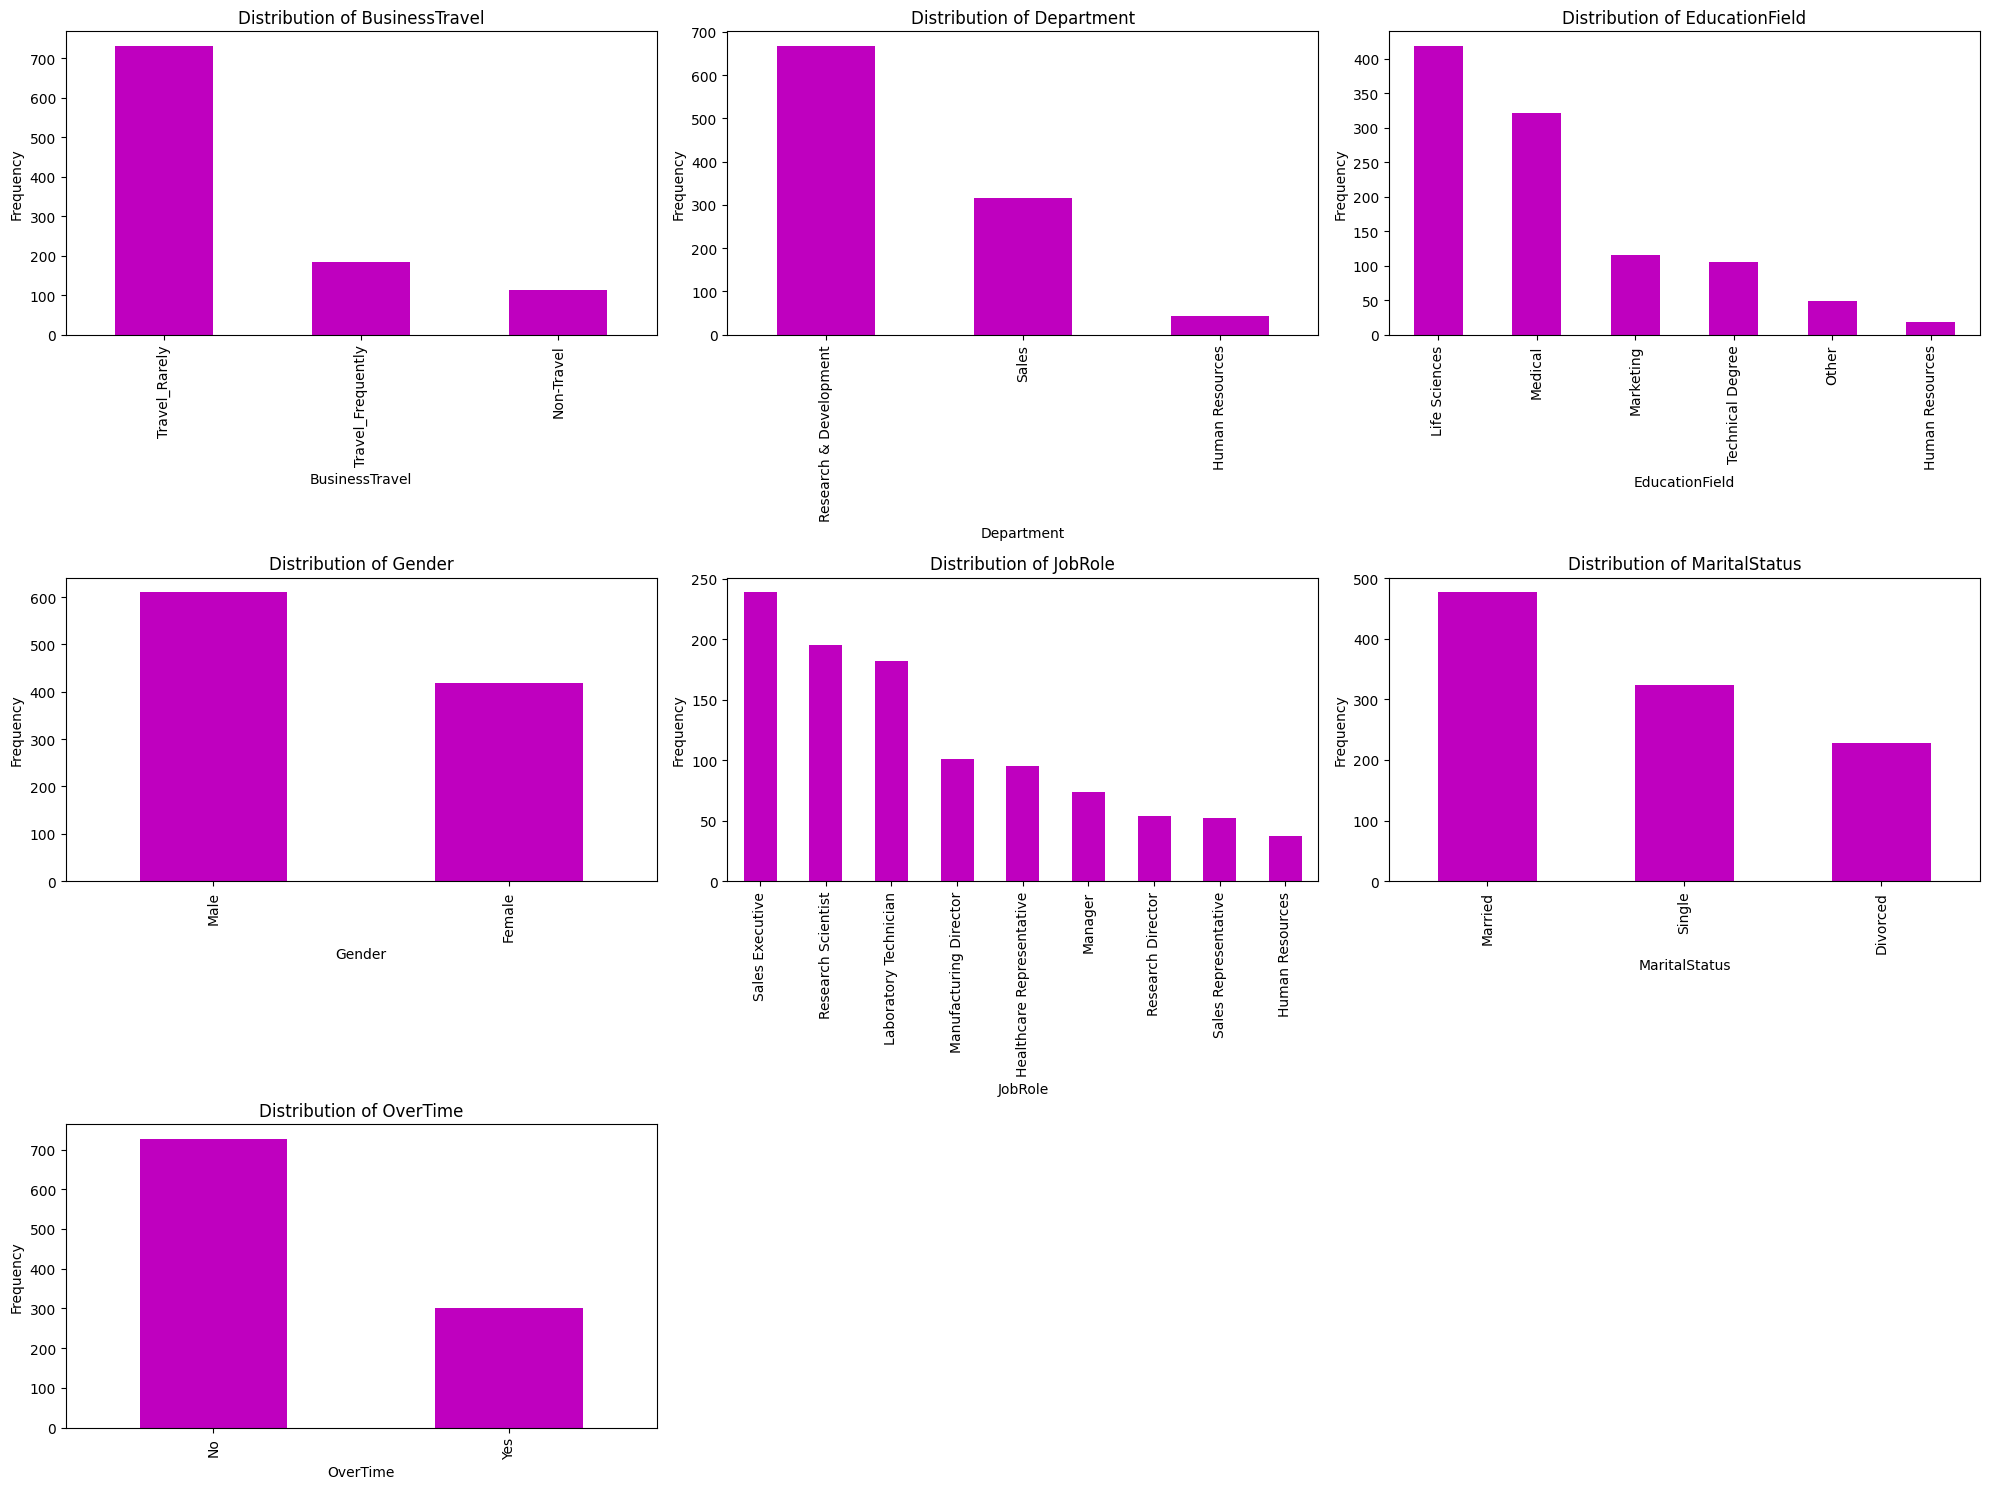

In [142]:
#Gráfico de Barras para variables categoricas Xtrain
categorical_columns_train = Xtrain.select_dtypes(exclude=['number']).columns

fig, axes = plt.subplots(math.ceil(len(categorical_columns_train) / 3), 3, figsize=(20, 5 * math.ceil(len(categorical_columns_train) / 3)))
axes = axes.flatten()

for i, col in enumerate(categorical_columns_train):
    Xtrain[col].value_counts().plot(kind='bar', ax=axes[i], color ='#BF00BF')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(categorical_columns_train), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<ipython-input-143-725df603e90c>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Attrition', loc='upper right')


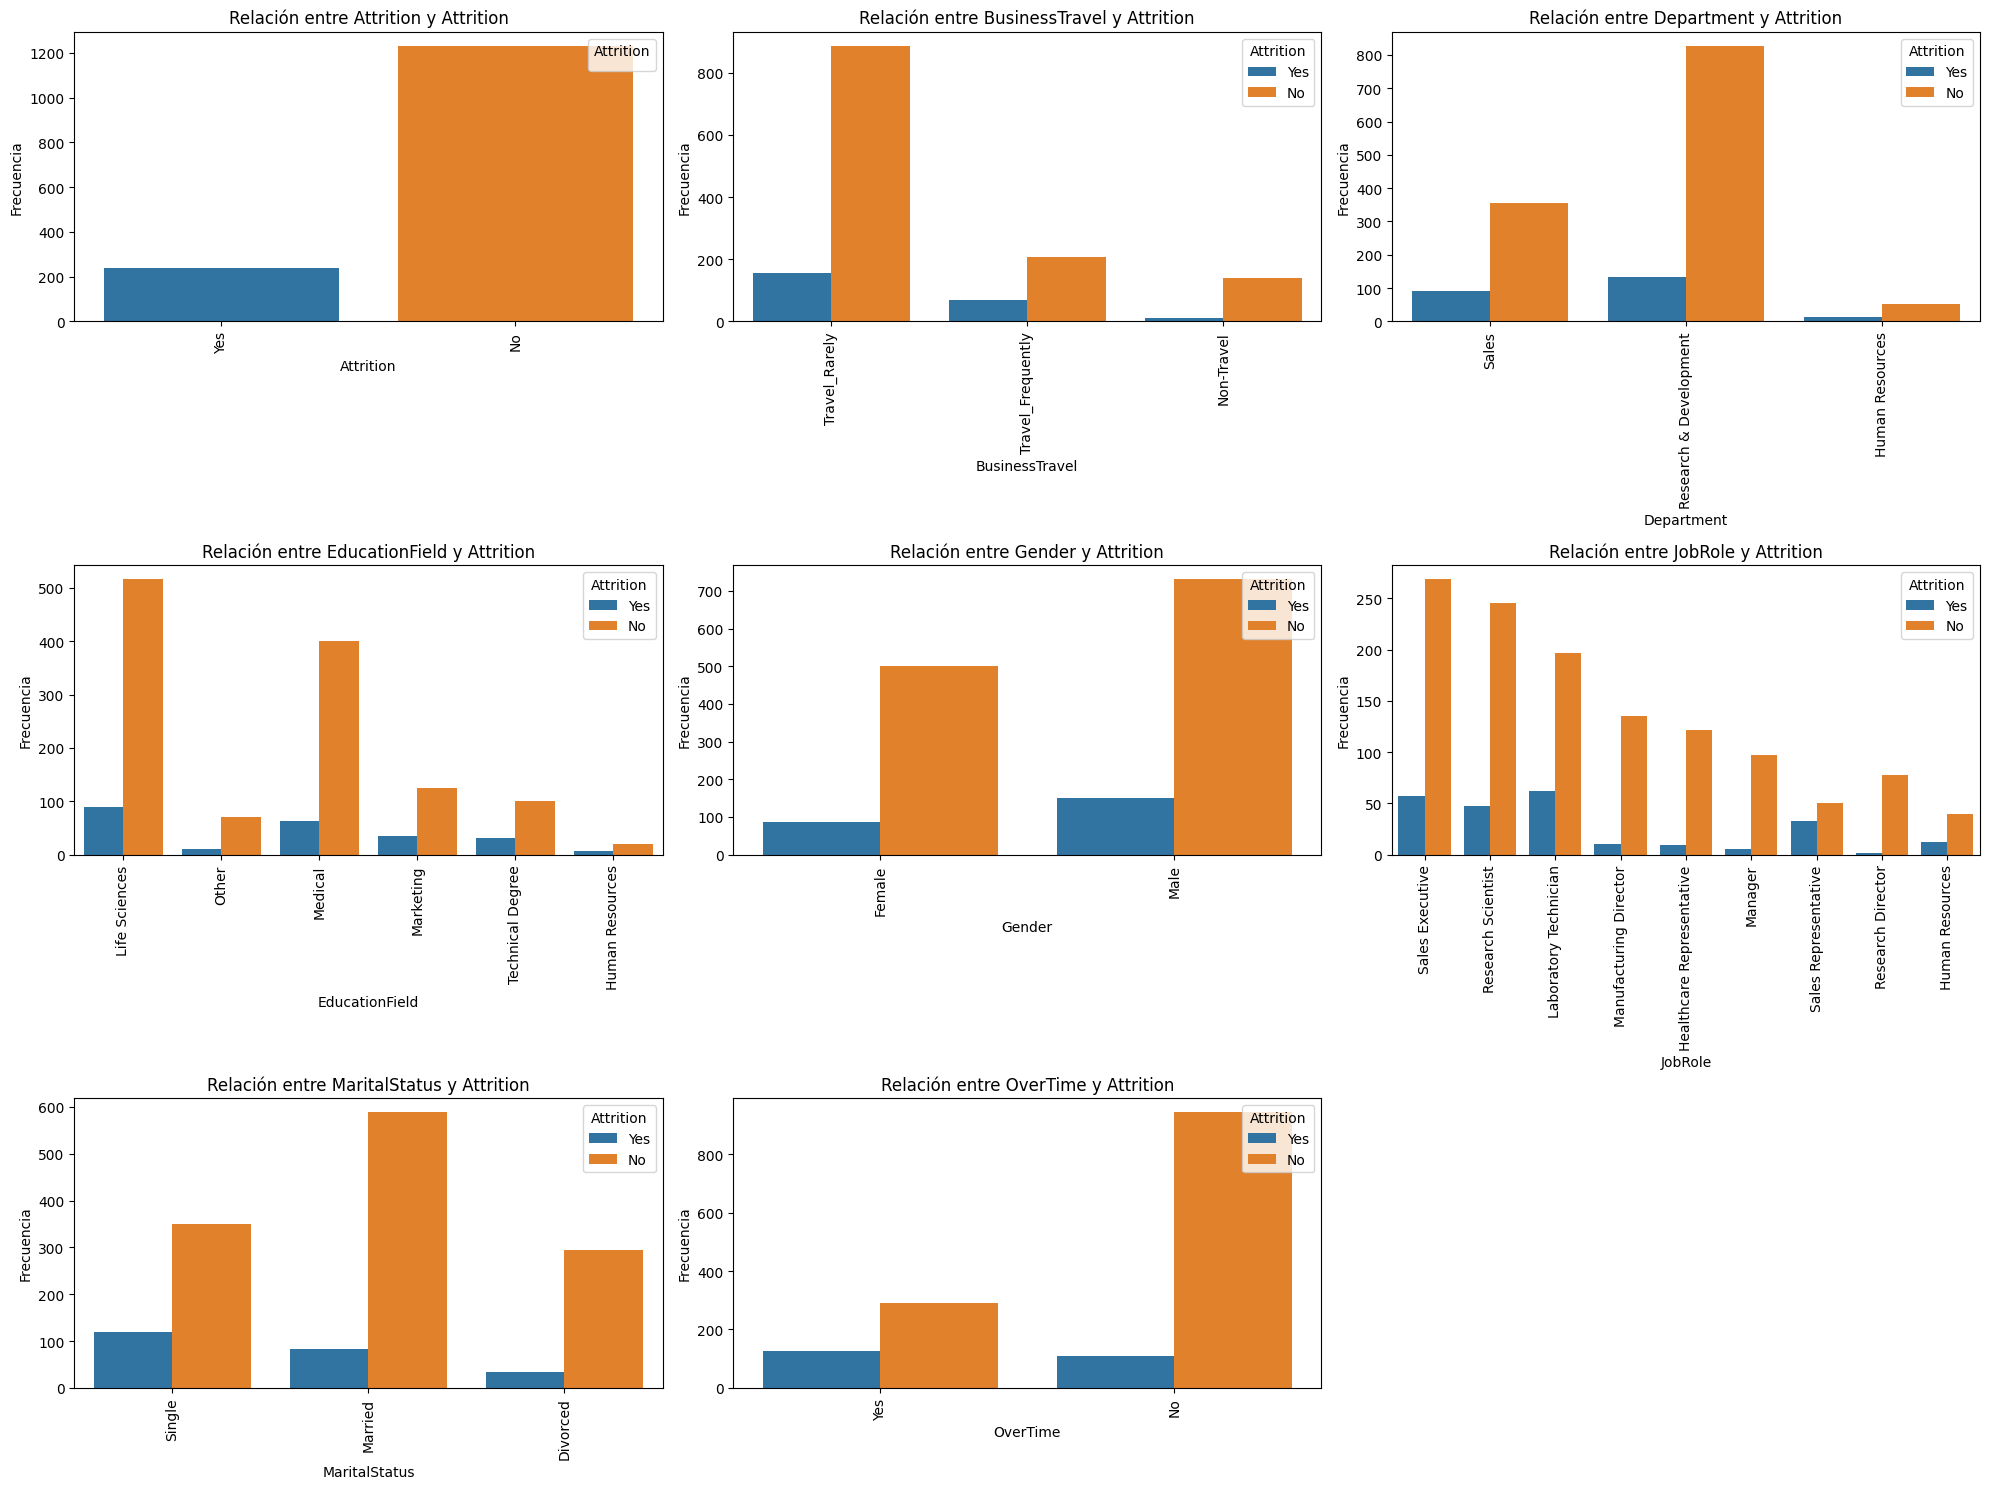


  - **Númericas**: Las variables numéricas, como Age, MonthlyIncome, y TotalWorkingYears, tienen escalas muy diferentes según los histogramas. Propongo estandarizarlas usando StandardScaler().
      Esto ayudará a evitar que las variables con valores mayores dominen el modelo. Por otro lado, debido a que las variables como DistanceFromHome y MonthlyIncome estan sesgadas, también recomiendo usar la transformación de Yeo-Johnson.
  - **Ordinales**: Para las variables ordinales, como Education, EnvironmentSatisfaction, y JobSatisfaction, recomiendo usar OrdinalEncoder() para respetar la jerarquía en sus categorías. Este método preserva el orden lógico sin alterar su significado.
  - **Binarias**: Sugiero transformarlas utilizando OneHotEncoder() con el parámetro drop='if_binary', para codificar las categorías como 0 y 1 y optimizando los modelos.
  - **Nominales**: Para variables como Department, JobRole, y EducationField, que no tienen un orden jerárquico, creo conveniente utilizar OneH

In [143]:
#Grafico de barras df con hue='Attrition'
fig, axes = plt.subplots(math.ceil(len(categorical_columns) / 3), 3, figsize=(20, 5 * math.ceil(len(categorical_columns) / 3)))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='Attrition', ax=axes[i])
    axes[i].set_title(f'Relación entre {col} y Attrition')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].legend(title='Attrition', loc='upper right')

for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
print("""
  - **Númericas**: Las variables numéricas, como Age, MonthlyIncome, y TotalWorkingYears, tienen escalas muy diferentes según los histogramas. Propongo estandarizarlas usando StandardScaler().
      Esto ayudará a evitar que las variables con valores mayores dominen el modelo. Por otro lado, debido a que las variables como DistanceFromHome y MonthlyIncome estan sesgadas, también recomiendo usar la transformación de Yeo-Johnson.
  - **Ordinales**: Para las variables ordinales, como Education, EnvironmentSatisfaction, y JobSatisfaction, recomiendo usar OrdinalEncoder() para respetar la jerarquía en sus categorías. Este método preserva el orden lógico sin alterar su significado.
  - **Binarias**: Sugiero transformarlas utilizando OneHotEncoder() con el parámetro drop='if_binary', para codificar las categorías como 0 y 1 y optimizando los modelos.
  - **Nominales**: Para variables como Department, JobRole, y EducationField, que no tienen un orden jerárquico, creo conveniente utilizar OneHotEncoder() para garantizar que todas las categorías sean tratadas de manera independiente.""")
# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [144]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# NUMÉRICAS:
numericas_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('yeo_johnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])
numericas_pipeline_nombres = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]
# ORDINALES:
catOrd_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])
catOrd_pipeline_nombres = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'WorkLifeBalance', 'StockOptionLevel'
]

# BINARIAS:
catBin_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary', sparse_output=False))
])
catBin_pipeline_nombres = [
    'Gender', 'OverTime'
]

# NOMINALES:
catNom_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False))
])
catNom_pipeline_nombres = [
    'BusinessTravel', 'Department', 'EducationField', 'JobRole',
    'MaritalStatus'
]


columnasTransformer = ColumnTransformer(transformers=[
    ('num', numericas_pipeline, numericas_pipeline_nombres),
    ('ord', catOrd_pipeline, catOrd_pipeline_nombres),
    ('bin', catBin_pipeline, catBin_pipeline_nombres),
    ('nom', catNom_pipeline, catNom_pipeline_nombres)
])

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [145]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


Xtv = pd.concat([Xtrain, Xval], axis=0)
ytv = pd.concat([pd.Series(ytrainT), pd.Series(yvalT)], axis=0)



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1249, 30)
(1249,)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

>> LR 0.881 (0.020)
>> LASSO 0.886 (0.019)
>> RIDGE 0.885 (0.018)
>> EN 0.886 (0.018)
>> kNN 0.847 (0.010)


<ipython-input-146-5027568dbac3>:75: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.


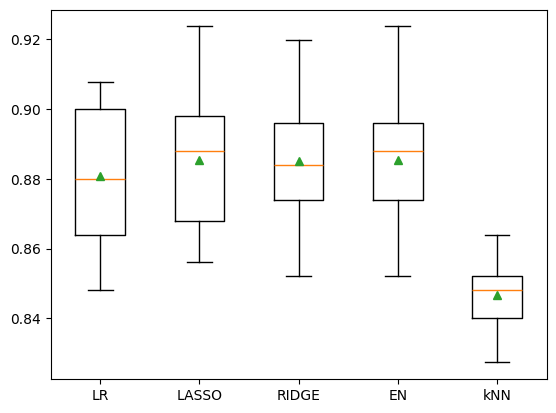

In [146]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs',
                                    max_iter=1000,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear',
                                    max_iter=1000,
                                    C =1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='lbfgs',
                                    max_iter=1000,
                                    C = 1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    solver='saga',
                                    l1_ratio=0.5,
                                    max_iter=1000,
                                    C = 1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=5,
                                    weights='uniform',
                                    metric='minkowski',
                                    p=2)) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [147]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


print("""Aunque LASSO y Elastic_Net tuvieron los mismos resultados en precisión, se elige Elastic_Net como mejor modelo debido a
su desviación estándar más baja, significando más estabilidad en los resultados. """)
modelo = LogisticRegression(penalty='elasticnet',
                                    solver='saga',
                                    l1_ratio=0.5,
                                    max_iter=1000,
                                    C = 1,
                                    random_state=1)

# Definir el espacio de búsqueda
dicc_grid = {
    'C': [0.01, 0.1, 1, 2, 10],  # Valores posibles para el hiperparámetro de regularización
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] # Probar diferentes combinaciones de L1 y L2
}

# Validación cruzada
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

# Búsqueda de malla
grid = GridSearchCV(
    estimator=modelo,
    param_grid=dicc_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

Xx = columnasTransformer.fit_transform(Xtv)

# Ajustar el modelo
grid_result = grid.fit(Xx, np.ravel(ytv))

# Verificar sobreentrenamiento
train_mean = np.nanmean(grid_result.cv_results_['mean_train_score'])
val_mean = np.nanmean(grid_result.cv_results_['mean_test_score'])

diferencia_porcentual = abs(train_mean - val_mean) * 100

print("""La diferencia en porcentaje entre el conjunto de entrenamiento y el de validación es %.2f%% y
tomando en cuenta la desviación estándar baja y el buen desempeño pero no tan alto, se puede decir que el modelo está bien ajustado.
""" % (diferencia_porcentual)
)

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Aunque LASSO y Elastic_Net tuvieron los mismos resultados en precisión, se elige Elastic_Net como mejor modelo debido a
su desviación estándar más baja, significando más estabilidad en los resultados. 
La diferencia en porcentaje entre el conjunto de entrenamiento y el de validación es 1.22% y
tomando en cuenta la desviación estándar baja y el buen desempeño pero no tan alto, se puede decir que el modelo está bien ajustado.

Mejor modelo: 0.885262 usando {'C': 1, 'l1_ratio': 0.9}
Promedios Train mean(std): 0.8856(0.0049)
Promedios Val mean(std): 0.8734(0.0148)


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

In [148]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.

# Definir el modelo base ya con mejores hiperparámetros
mejor_modelo = LogisticRegression(penalty='elasticnet',
                                    solver='saga',
                                    l1_ratio=0.9,
                                    max_iter=1000,
                                    C = 1,
                                    random_state=1)

Xx = columnasTransformer.fit_transform(Xtv)

mejor_result = mejor_modelo.fit(Xx, np.ravel(ytv))


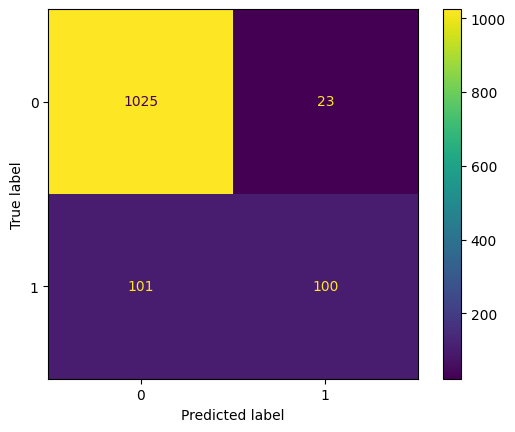

In [149]:
#a) Matriz de Confusión y accuracy
ConfusionMatrixDisplay.from_estimator(mejor_result, Xx, np.ravel(ytv))
plt.show()

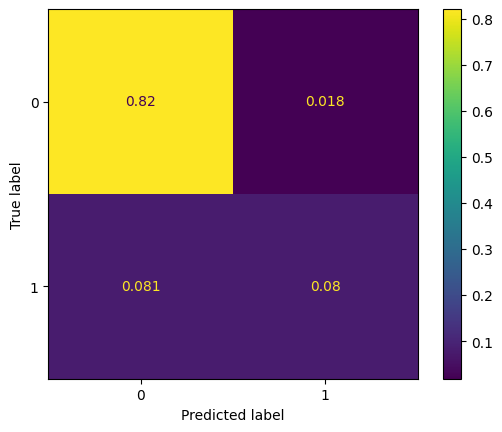

In [150]:
#Matriz de Confusión Normalizada
ConfusionMatrixDisplay.from_estimator(mejor_result, Xx, np.ravel(ytv), normalize='all')
plt.show()

In [151]:
# b) Análisis de importancia de factores
# Para obtener los coeficientes más importantes del mejor modelo obtenido:
mejor_result.coef_

array([[-0.24998599, -0.06930581,  0.3230733 , -0.06720559, -0.61341579,
         0.00507448,  0.59357416, -0.11261649, -0.58441718, -0.26503586,
         0.27600834, -0.33600084,  0.38726421, -0.28230066,  0.03462441,
        -0.4825712 , -0.48126424,  0.43578226, -0.40072582,  0.        ,
        -0.27144948, -0.29776469, -0.29389111,  0.30990785,  1.89282474,
        -0.7924682 ,  0.9527788 ,  0.        ,  0.        , -0.49231519,
         0.        ,  0.        , -0.05806262,  0.11051671, -0.17333513,
        -0.10286816,  0.46682108, -0.13390208,  0.22529067,  0.74949785,
         0.        ,  0.        , -0.51092482, -0.21209131,  0.27412551,
         0.63232441, -0.32409001,  0.        ,  0.6687355 ]])

In [152]:
# con los nombres de los factores:
pd.DataFrame(data = mejor_result.coef_.reshape(-1,1),
             index = columnasTransformer.get_feature_names_out(),columns=["Coeficiente"])

,Coeficiente
num__Age,-0.249986
num__DailyRate,-0.069306
num__DistanceFromHome,0.323073
num__HourlyRate,-0.067206
num__MonthlyIncome,-0.613416
num__MonthlyRate,0.005074
num__NumCompaniesWorked,0.593574
num__PercentSalaryHike,-0.112616
num__TotalWorkingYears,-0.584417
num__TrainingTimesLastYear,-0.265036


In [153]:
#De mayor a menor
pd.DataFrame(data = mejor_result.coef_.reshape(-1,1),
             index = columnasTransformer.get_feature_names_out(),columns=["Coeficiente"]).sort_values(by="Coeficiente", ascending=False)

,Coeficiente
bin__OverTime_Yes,1.892825
nom__BusinessTravel_Travel_Frequently,0.952779
nom__JobRole_Laboratory Technician,0.749498
nom__MaritalStatus_Single,0.668735
nom__JobRole_Sales Representative,0.632324
num__NumCompaniesWorked,0.593574
nom__EducationField_Technical Degree,0.466821
ord__JobLevel,0.435782
num__YearsSinceLastPromotion,0.387264
num__DistanceFromHome,0.323073


In [154]:
print("""Los factores más importantes que explican la variabilidad de la rotación de personal son:

  1. OverTime_Yes (coeficiente = 1.89): Trabajar horas extra es el factor más relevante, ya que incrementa significativamente la probabilidad de rotación, posiblemente debido al impacto negativo del exceso de trabajo.

  2. BusinessTravel_Travel_Frequently (coeficiente = 0.95): Viajar frecuentemente por trabajo influye de manera significativa en la rotación de personal, esto debido tal vez al estres que causan estas actividades.

  3. JobRole_Laboratory Technician (coeficiente = 0.75): Ser tecnico de laboratorio también aumenta notablemente esta probabilidad, lo cual podría estar relacionado con las condiciones laborales específicas de este rol dentro de la empresa de donde se sacaron los datos.

Estos factores tienen un impacto positivo significativo en la predicción.
Factores con impacto negativo:

Por otro lado, factores con impacto negativo como BusinessTravel_Non-Travel (coeficiente = -0.80) o TotalWorkingYears (coeficiente = -0.58) indican que no viajar por trabajo o la antigüedad disminuyen la probabilidad de rotación,
por lo que a través de estos resultados la empresa en la cual estos datos fueron tomados puede saber a que factores prestar más atención para evitar la rotación de personal muy frecuente.""")

Los factores más importantes que explican la variabilidad de la rotación de personal son:

  1. OverTime_Yes (coeficiente = 1.89): Trabajar horas extra es el factor más relevante, ya que incrementa significativamente la probabilidad de rotación, posiblemente debido al impacto negativo del exceso de trabajo.

  2. BusinessTravel_Travel_Frequently (coeficiente = 0.95): Viajar frecuentemente por trabajo influye de manera significativa en la rotación de personal, esto debido tal vez al estres que causan estas actividades.

  3. JobRole_Laboratory Technician (coeficiente = 0.75): Ser tecnico de laboratorio también aumenta notablemente esta probabilidad, lo cual podría estar relacionado con las condiciones laborales específicas de este rol dentro de la empresa de donde se sacaron los datos.

Estos factores tienen un impacto positivo significativo en la predicción.
Factores con impacto negativo:

Por otro lado, factores con impacto negativo como BusinessTravel_Non-Travel (coeficiente = -0.80)

In [155]:
# c) Reporte de métricas
# Predicciones en los datos de prueba
y_pred = mejor_result.predict(columnasTransformer.transform(Xtv))
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [166]:
#métricas
report = classification_report(np.ravel(encoder.inverse_transform(ytv)), np.ravel(encoder.inverse_transform(y_pred)))
print(report)
# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

              precision    recall  f1-score   support

          No       0.91      0.98      0.94      1048
         Yes       0.81      0.50      0.62       201

    accuracy                           0.90      1249
   macro avg       0.86      0.74      0.78      1249
weighted avg       0.89      0.90      0.89      1249



# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [161]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
#Desempeño Final
mejor_result.score(columnasTransformer.transform(Xtest), np.ravel(ytestT))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

0.8687782805429864

# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

Esta actividad me permitió identificar una problemática muy común en cualquier empresa, la rotación de personal. Es así como conozco empresas que tienen un departamento exclusivo para estudiar lo visto en esta actividad de manera más detallada y poder actuar ante esta problematica.

Por mi parte, esta actividad me da los fundamentos teóricos, a través de un problema práctico, de los problemas de clasificación y todos los análisis que estos tipos de problemas conllevan. Además, a través de esta actividad es posible observar como en el mundo real no todos los sets de datos son perfectos y balanceados; sin embargo, es posible generar análisis de valor si esos datos son trabajados de la manera más adecuada.



#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<